In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
Df = pd.read_csv(r"C:\Users\acksh\OneDrive\Desktop\MSAI\Machine Learning\Final_project\data\owid-co2-data.csv")
Df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50191.000000,4.101900e+04,1.525100e+04,28863.000000,25358.000000,29137.000000,26981.000000,26002.000000,23585.000000,23285.000000,...,2108.000000,41001.000000,38060.000000,41001.000000,41001.000000,38060.000000,37410.000000,37236.000000,4535.000000,4535.000000
mean,1919.883067,5.686141e+07,3.300495e+11,7.767746,0.059036,415.698178,6.208882,43.104462,535.581202,7.214604,...,7.512655,2.269285,0.003026,0.007670,0.011023,0.000509,488.542225,316.133529,-7.232399,20.524440
std,65.627296,3.199905e+08,3.086383e+12,62.595292,0.120328,1945.843973,62.322553,1729.939596,2202.219657,99.347980,...,17.671054,9.315325,0.016519,0.043694,0.061901,0.003043,2392.579910,1839.602293,250.640012,52.744956
min,1750.000000,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1977.750000,-100.000000,-99.693000,-2325.500000,...,0.000000,-0.810000,-0.001000,0.000000,-0.001000,0.000000,-14.961000,0.000000,-2195.952000,-98.849000
25%,1875.000000,3.273130e+05,7.874038e+09,0.000000,0.000000,0.374000,-0.005000,-1.102500,6.418000,-0.908000,...,0.204750,0.004000,0.000000,0.000000,0.000000,0.000000,1.835000,0.235000,-3.179500,-6.168000
50%,1924.000000,2.289522e+06,2.743861e+10,0.000000,0.001000,4.990000,0.044000,3.803500,27.691000,0.078000,...,0.838000,0.078000,0.000000,0.000000,0.000000,0.000000,15.007500,2.371000,1.518000,8.701000
75%,1974.000000,9.862459e+06,1.212627e+11,0.486000,0.075750,53.273000,1.002000,10.890750,123.959000,2.620000,...,3.211000,0.359000,0.001000,0.001000,0.001000,0.000000,78.242750,29.337500,9.153500,32.666000
max,2023.000000,8.091735e+09,1.301126e+14,1696.308000,2.484000,37791.570000,1865.208000,180870.000000,41416.480000,2340.184000,...,100.000000,100.000000,0.422000,1.161000,1.668000,0.085000,53816.852000,44114.785000,1798.999000,568.635000


In [4]:
def clean_country_dataset(file_path):
    """
    Removes rows where CO2 values are missing, removes the country column,
    and saves the file with the same name.
    
    Parameters:
    file_path (str): Path to the country-specific CSV file
    """
    try:
        # Read the dataset
        df = pd.read_csv(file_path)
        
        # Check initial shape
        initial_rows = df.shape[0]
        initial_cols = df.shape[1]
        
        # Remove rows where CO2 is null/NaN
        df_cleaned = df.dropna(subset=['co2'])
        
        # Remove the country column
        if 'country' in df_cleaned.columns:
            df_cleaned = df_cleaned.drop(columns=['country'])
        
        # Check final shape
        final_rows = df_cleaned.shape[0]
        final_cols = df_cleaned.shape[1]
        removed_rows = initial_rows - final_rows
        
        # Save back to the same file
        df_cleaned.to_csv(file_path, index=False)
        
        print(f"Processed {file_path}")
        print(f"  Removed {removed_rows} rows with missing CO2 values")
        print(f"  Removed country column")
        print(f"  Saved file with {final_rows} rows and {final_cols} columns\n")
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

In [5]:

output_dir = r"C:\Users\acksh\OneDrive\Desktop\MSAI\Machine Learning\Final_project\data\databycountry"

files = [f for f in os.listdir(output_dir) if f.endswith('.csv')]
    
print(f"Found {len(files)} country files to process")

# # Process each file
# for file in files:
#     file_path = os.path.join(output_dir, file)
#     clean_country_dataset(file_path)

print("All country files processed successfully")

Found 255 country files to process
All country files processed successfully


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def analyze_country_data(file_path, target_variable='co2'):
    """
    Perform extensive data analysis on a country-specific dataset to prepare for regression.
    
    Parameters:
    file_path (str): Path to the country CSV file
    target_variable (str): The target variable for regression analysis
    """
    # Load the data
    print(f"Analyzing data from: {file_path}")
    df = pd.read_csv(file_path)
    
    # Basic information
    print("\n===== BASIC DATASET INFORMATION =====")
    print(f"Dataset shape: {df.shape}")
    print(f"Time period covered: {df['year'].min()} to {df['year'].max()}")
    
    # Check for remaining missing values
    missing_values = df.isnull().sum()
    missing_pct = (missing_values / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_pct
    })
    print("\n===== MISSING VALUES ANALYSIS =====")
    print(missing_summary[missing_summary['Missing Values'] > 0].sort_values('Missing Values', ascending=False))
    
    # Check if target variable exists
    if target_variable not in df.columns:
        print(f"ERROR: Target variable '{target_variable}' not found in dataset!")
        return
    
    # Numeric columns (excluding year, iso_code and target variable)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'year' in numeric_cols:
        numeric_cols.remove('year')
    if 'iso_code' in numeric_cols:
        numeric_cols.remove('iso_code')
    
    
    # Distribution of target variable
    print(f"\n===== TARGET VARIABLE ANALYSIS: {target_variable} =====")
    print(f"Target variable statistics:\n{df[target_variable].describe()}")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    sns.histplot(df[target_variable], kde=True)
    plt.title(f'Distribution of {target_variable}')
    
    plt.subplot(122)
    sns.lineplot(x='year', y=target_variable, data=df)
    plt.title(f'Trend of {target_variable} over time')
    plt.tight_layout()
    plt.show()
    
    # Check skewness of target variable
    skewness = stats.skew(df[target_variable].dropna())
    print(f"Skewness of {target_variable}: {skewness:.4f}")
    if abs(skewness) > 1:
        print(f"Recommendation: Consider log transformation of {target_variable} due to high skewness")
    
    # Create correlation matrix
    print("\n===== CORRELATION ANALYSIS =====")
    correlation_threshold = 0.7
    if target_variable in df.columns:
    # Create correlation matrix with target included
        corr_matrix = df[numeric_cols].corr()
    else:
        print(f"Warning: Target variable '{target_variable}' not found in columns")
        
    # Plot heatmap
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    
    
    # Find features highly correlated with target
    target_corr = corr_matrix[target_variable].sort_values(ascending=False)
    print(f"Top correlations with {target_variable}:")
    print(target_corr[1:6])  # Skip the first one which is the target itself
    
    # Find highly correlated features
    print("\nStrongly correlated feature pairs (potential multicollinearity):")
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= correlation_threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
                
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
        high_corr_df = high_corr_df.sort_values('Correlation', ascending=False)
        print(high_corr_df)
    else:
        print("No feature pairs with correlation >= 0.7 found.")
    
    if target_variable in numeric_cols:
        numeric_cols.remove(target_variable)
    
    # VIF analysis for multicollinearity
    print("\n===== MULTICOLLINEARITY ANALYSIS (VIF) =====")
    # Only include numeric features with sufficient non-null values
    vif_features = [col for col in numeric_cols 
                    if df[col].count() > df.shape[0] * 0.7]  # At least 70% non-null
    
    if len(vif_features) > 1:  # Need at least 2 features for VIF
        X = df[vif_features].dropna()
        
        # Calculate VIF
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        print(vif_data.sort_values("VIF", ascending=False))
        print("\nVIF > 10 suggests high multicollinearity")
        print("VIF > 5 suggests moderate multicollinearity")
    else:
        print("Not enough complete features for VIF analysis")
    
    # Feature importance using Random Forest
    print("\n===== FEATURE IMPORTANCE ANALYSIS =====")
    features_for_rf = [col for col in numeric_cols 
                      if df[col].count() > df.shape[0] * 0.7]
    
    if len(features_for_rf) > 0:
        # Create feature and target arrays
        X_rf = df[features_for_rf].fillna(df[features_for_rf].median())
        y_rf = df[target_variable].values
        
        # Train Random Forest for feature importance
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_rf, y_rf)
        
        # Get feature importances
        importances = rf.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Print feature ranking
        print("Feature ranking:")
        for f in range(min(10, X_rf.shape[1])):
            print(f"{f+1}. {X_rf.columns[indices[f]]} ({importances[indices[f]]:.4f})")
        
        # Plot feature importances
        plt.figure(figsize=(10, 6))
        plt.title("Feature importances")
        plt.bar(range(min(10, X_rf.shape[1])), 
                importances[indices[:10]],
                align="center")
        plt.xticks(range(min(10, X_rf.shape[1])), 
                  [X_rf.columns[i] for i in indices[:10]], 
                  rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough complete features for Random Forest importance analysis")
    
    # Normalization/standardization assessment
    print("\n===== SCALING ASSESSMENT =====")
    # Statistics for numeric features
    stats_df = df[numeric_cols].describe().T
    stats_df['range'] = stats_df['max'] - stats_df['min']
    stats_df['coefficient_of_variation'] = stats_df['std'] / stats_df['mean']
    
    # Identify variables that need scaling
    stats_df['needs_scaling'] = stats_df['range'] > 10
    
    print("Features that may need scaling:")
    scaling_needed = stats_df[stats_df['needs_scaling']].sort_values('range', ascending=False)
    print(scaling_needed[['min', 'max', 'range']])
    
    # Check for outliers
    print("\n===== OUTLIER ANALYSIS =====")
    # Z-score method
    z_threshold = 3
    outlier_cols = []
    
    for col in numeric_cols:
        if df[col].count() > df.shape[0] * 0.5:  # At least 50% non-null
            z_scores = np.abs(stats.zscore(df[col].dropna()))
            outliers = (z_scores > z_threshold).sum()
            if outliers > 0:
                outlier_cols.append((col, outliers, outliers/df[col].count()*100))
    
    if outlier_cols:
        outlier_df = pd.DataFrame(outlier_cols, columns=['Feature', 'Outlier Count', 'Outlier Percentage'])
        outlier_df = outlier_df.sort_values('Outlier Count', ascending=False)
        print(outlier_df)
        
        # Plot top 3 features with most outliers
        if len(outlier_df) > 0:
            plt.figure(figsize=(15, 5))
            for i, col in enumerate(outlier_df['Feature'].head(min(3, len(outlier_df)))):
                plt.subplot(1, 3, i+1)
                sns.boxplot(y=df[col])
                plt.title(f'Boxplot of {col}')
            plt.tight_layout()
            plt.show()
    else:
        print("No significant outliers found using z-score method.")
    
    # Provide summary and recommendations
    print("\n===== SUMMARY AND RECOMMENDATIONS =====")
    
    # Recommendation for handling missing values
    high_missing = missing_summary[missing_summary['Percentage'] > 30].index.tolist()
    if high_missing:
        print(f"• Consider dropping features with high missing values: {', '.join(high_missing)}")
        
    # Recommendations for multicollinearity
    if high_corr_pairs:
        print("• Address multicollinearity by:")
        print("  - Use regularization techniques (Ridge or Lasso regression)")
        print("  - Consider dropping one feature from each highly correlated pair")
        print("  - Consider creating composite variables or performing dimension reduction")
    
    # Recommendations for feature importance
    if len(features_for_rf) > 0:
        top_features = [X_rf.columns[i] for i in indices[:5]]
        print(f"• Focus on top important features: {', '.join(top_features)}")
    
    # Recommendations for scaling
    if not scaling_needed.empty:
        print("• Apply appropriate scaling:")
        print("  - Use StandardScaler for features with normal distribution")
        print("  - Use MinMaxScaler for features with non-normal distribution")
        print("  - Consider log transformation for heavily skewed variables")
    
    # Recommendations for time-series aspects
    print("• For time-series aspects:")
    print("  - Check for autocorrelation in residuals")
    print("  - Consider including lagged variables")
    print("  - Test for stationarity in time-dependent variables")
    
    return df


Analyzing data from: C:\Users\acksh\OneDrive\Desktop\MSAI\Machine Learning\Final_project\data\databycountry\Afghanistan.csv

===== BASIC DATASET INFORMATION =====
Dataset shape: (75, 78)
Time period covered: 1949 to 2023

===== MISSING VALUES ANALYSIS =====
                                     Missing Values  Percentage
cumulative_other_co2                             75  100.000000
consumption_co2                                  75  100.000000
trade_co2                                        75  100.000000
share_global_other_co2                           75  100.000000
share_global_cumulative_other_co2                75  100.000000
other_industry_co2                               75  100.000000
other_co2_per_capita                             75  100.000000
consumption_co2_per_gdp                          75  100.000000
consumption_co2_per_capita                       75  100.000000
trade_co2_share                                  75  100.000000
co2_per_unit_energy                   

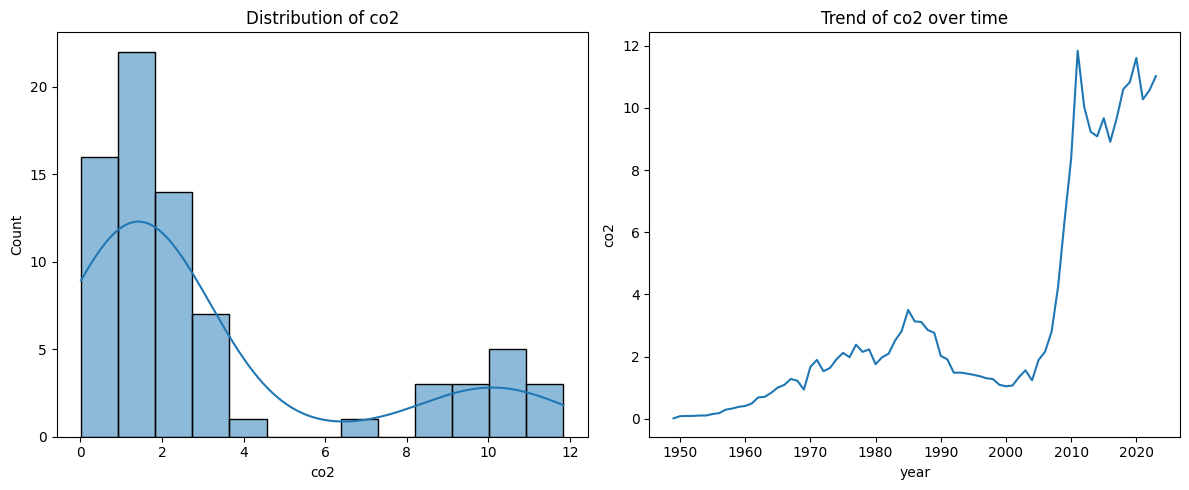

Skewness of co2: 1.3859
Recommendation: Consider log transformation of co2 due to high skewness

===== CORRELATION ANALYSIS =====


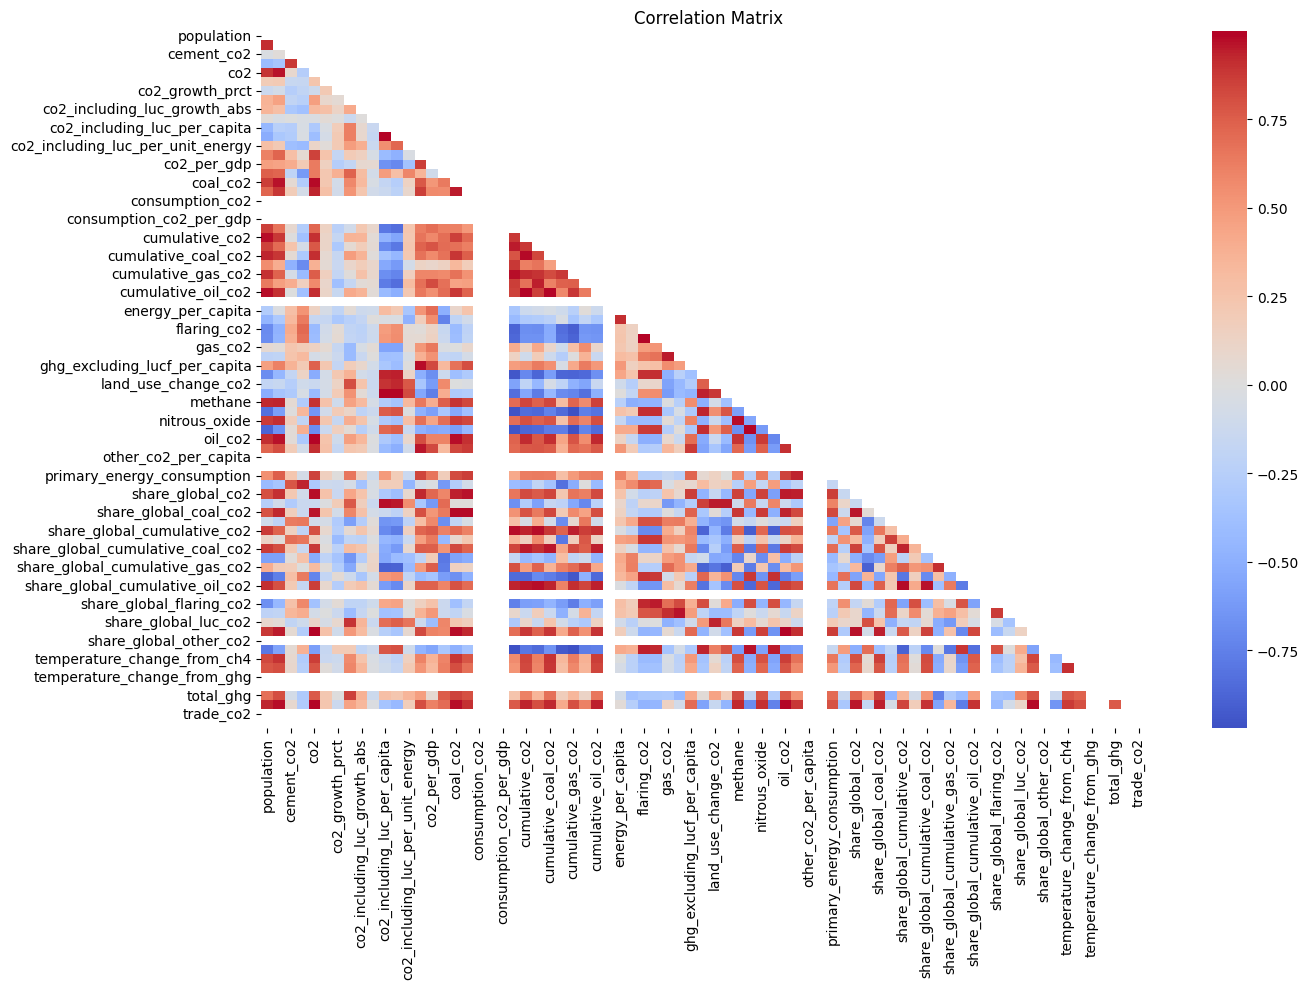

Top correlations with co2:
oil_co2                     0.993456
total_ghg_excluding_lucf    0.992642
share_global_oil_co2        0.988691
coal_co2                    0.979475
share_global_co2            0.972580
Name: co2, dtype: float64

Strongly correlated feature pairs (potential multicollinearity):
                 Feature 1                             Feature 2  Correlation
212         cumulative_co2                    cumulative_oil_co2     0.997747
331            flaring_co2                flaring_co2_per_capita     0.995655
437                oil_co2                  share_global_oil_co2     0.993737
69                     co2                               oil_co2     0.993456
82                     co2              total_ghg_excluding_lucf     0.992642
..                     ...                                   ...          ...
197  cumulative_cement_co2                    methane_per_capita    -0.956961
289     cumulative_gas_co2                    methane_per_capita    -0.9

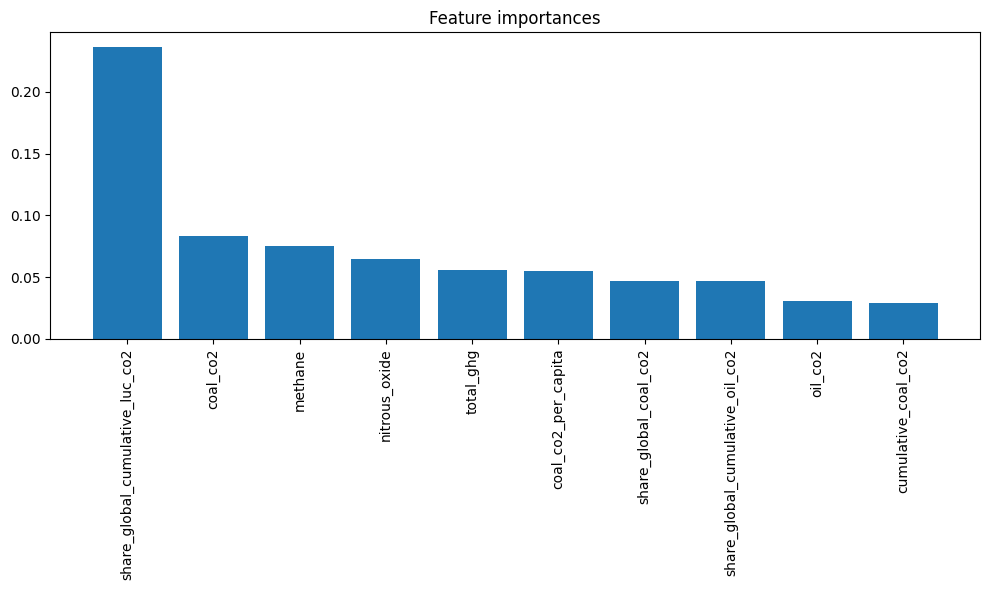


===== SCALING ASSESSMENT =====
Features that may need scaling:
                                        min           max         range
gdp                            7.919857e+09  7.308571e+10  6.516585e+10
population                     7.356890e+06  4.145476e+07  3.409787e+07
energy_per_capita              2.042310e+02  3.139185e+03  2.934954e+03
co2_including_luc_growth_prct -2.289960e+02  1.342009e+03  1.571005e+03
cumulative_co2_including_luc   6.250000e+00  6.005950e+02  5.943450e+02
co2_growth_prct               -2.678400e+01  4.750000e+02  5.017840e+02
cumulative_luc_co2             5.195030e+02  8.770220e+02  3.575190e+02
cumulative_co2                 1.500000e-02  2.368410e+02  2.368260e+02
cumulative_oil_co2             0.000000e+00  1.447850e+02  1.447850e+02
cumulative_coal_co2            1.500000e-02  6.316100e+01  6.314600e+01
primary_energy_consumption     4.428000e+00  4.200500e+01  3.757700e+01
co2_including_luc             -2.575000e+00  2.845200e+01  3.102700e+01


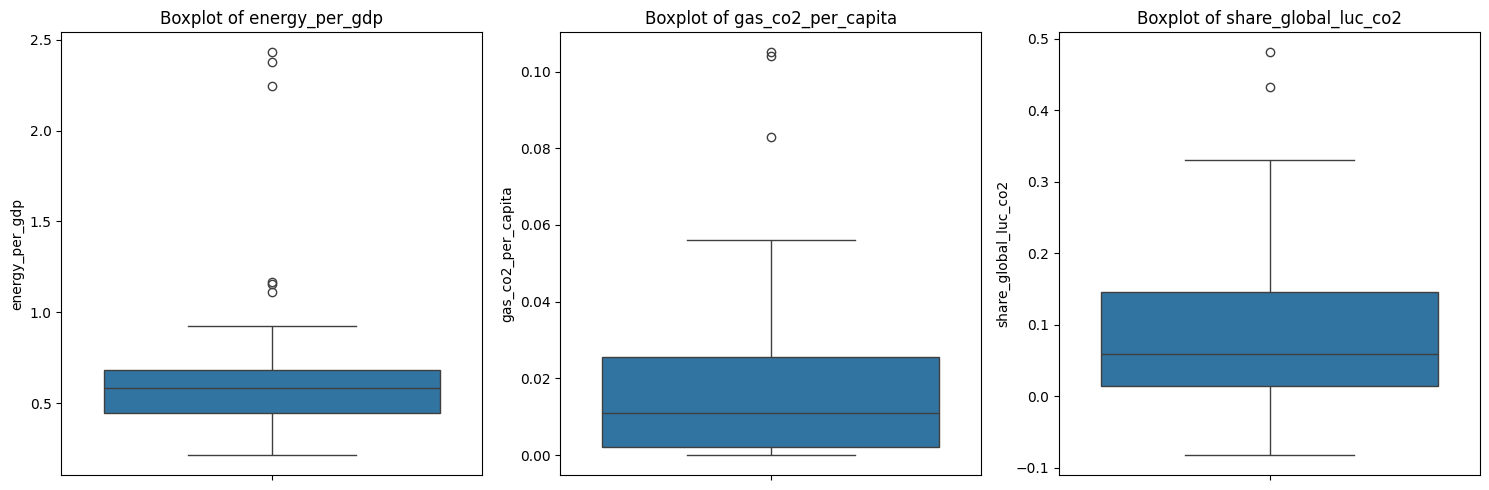


===== SUMMARY AND RECOMMENDATIONS =====
• Consider dropping features with high missing values: co2_including_luc_per_unit_energy, co2_per_unit_energy, consumption_co2, consumption_co2_per_capita, consumption_co2_per_gdp, cumulative_other_co2, energy_per_capita, energy_per_gdp, other_co2_per_capita, other_industry_co2, primary_energy_consumption, share_global_cumulative_other_co2, share_global_other_co2, trade_co2, trade_co2_share
• Address multicollinearity by:
  - Use regularization techniques (Ridge or Lasso regression)
  - Consider dropping one feature from each highly correlated pair
  - Consider creating composite variables or performing dimension reduction
• Focus on top important features: share_global_cumulative_luc_co2, coal_co2, methane, nitrous_oxide, total_ghg
• Apply appropriate scaling:
  - Use StandardScaler for features with normal distribution
  - Use MinMaxScaler for features with non-normal distribution
  - Consider log transformation for heavily skewed variables
• 

,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,1949,AFG,7356890.0,NaN,0.000,0.000,0.015,NaN,NaN,6.250,...,NaN,0.128,0.000,0.000,0.001,0.0,18.288,1.297,NaN,NaN
1,1950,AFG,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,7.316,...,NaN,0.128,0.000,0.000,0.001,0.0,19.447,1.453,NaN,NaN
2,1951,AFG,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,8.264,...,NaN,0.128,0.000,0.000,0.001,0.0,20.458,1.473,NaN,NaN
3,1952,AFG,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,9.192,...,NaN,0.128,0.000,0.000,0.001,0.0,21.356,1.484,NaN,NaN
4,1953,AFG,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,10.269,...,NaN,0.128,0.000,0.000,0.001,0.0,22.361,1.517,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2019,AFG,37856126.0,7.308571e+10,0.038,0.001,10.825,0.223,2.106,19.743,...,NaN,0.083,0.001,0.001,0.001,0.0,39.145,18.538,NaN,NaN
71,2020,AFG,39068978.0,7.141771e+10,0.061,0.002,11.606,0.781,7.213,16.833,...,NaN,0.083,0.001,0.001,0.001,0.0,37.833,18.633,NaN,NaN
72,2021,AFG,40000411.0,5.663885e+10,0.016,0.000,10.272,-1.334,-11.495,22.036,...,NaN,0.084,0.001,0.001,0.001,0.0,38.313,17.947,NaN,NaN
73,2022,AFG,40578846.0,5.330347e+10,0.016,0.000,10.558,0.286,2.784,25.863,...,NaN,0.084,0.001,0.001,0.001,0.0,39.485,18.355,NaN,NaN


In [16]:
analyze_country_data(os.path.join(output_dir,f"Afghanistan.csv"))